In [1]:
import numpy as np
import pandas as pd



In [3]:
import os


In [4]:
train_data = pd.read_csv('/content/train.csv')

In [5]:
test_data = pd.read_csv('/content/test.csv')

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [14]:
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as skpp
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Activation
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
from keras.optimizers import Adam
import tensorflow as tf


<Axes: >

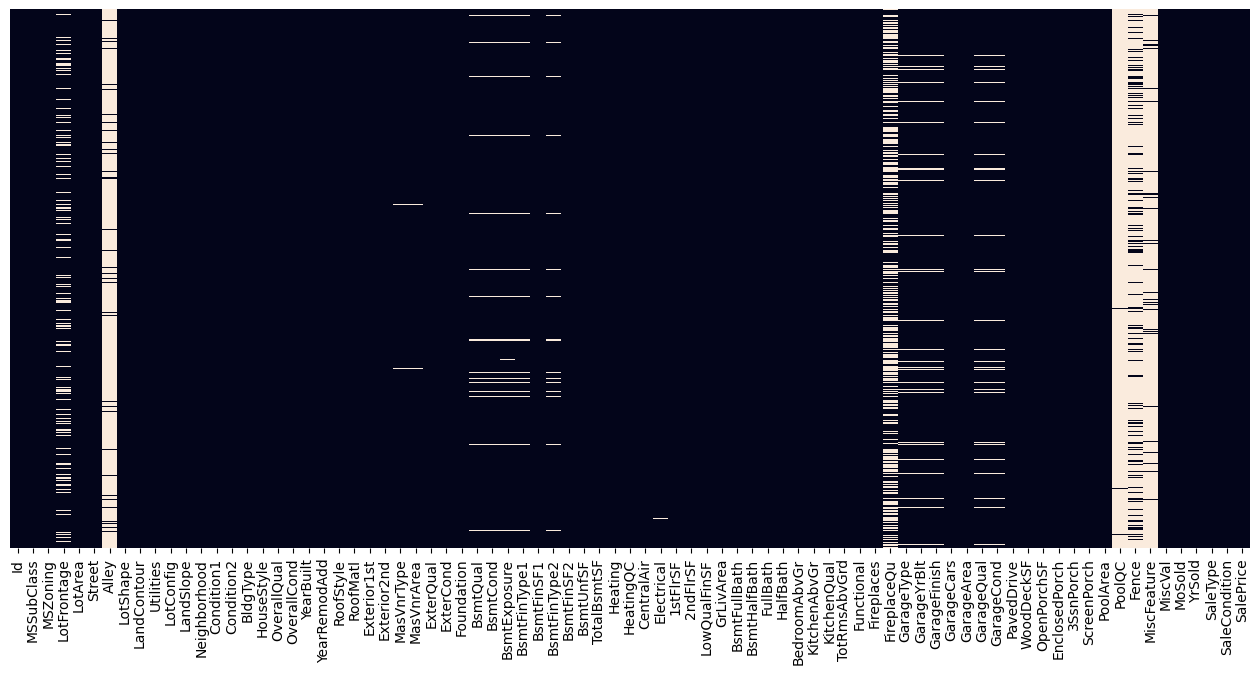

In [15]:
plt.figure(figsize = (16,7))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

Total Data in Test Set: 1459

Missing Values in Test Set:

MSZoning:4
LotFrontage:227
Alley:1352
Utilities:2
Exterior1st:1
Exterior2nd:1
MasVnrType:16
MasVnrArea:15
BsmtQual:44
BsmtCond:45
BsmtExposure:44
BsmtFinType1:42
BsmtFinSF1:1
BsmtFinType2:42
BsmtFinSF2:1
BsmtUnfSF:1
TotalBsmtSF:1
BsmtFullBath:2
BsmtHalfBath:2
KitchenQual:1
Functional:2
FireplaceQu:730
GarageType:76
GarageYrBlt:78
GarageFinish:78
GarageCars:1
GarageArea:1
GarageQual:78
GarageCond:78
PoolQC:1456
Fence:1169
MiscFeature:1408
SaleType:1


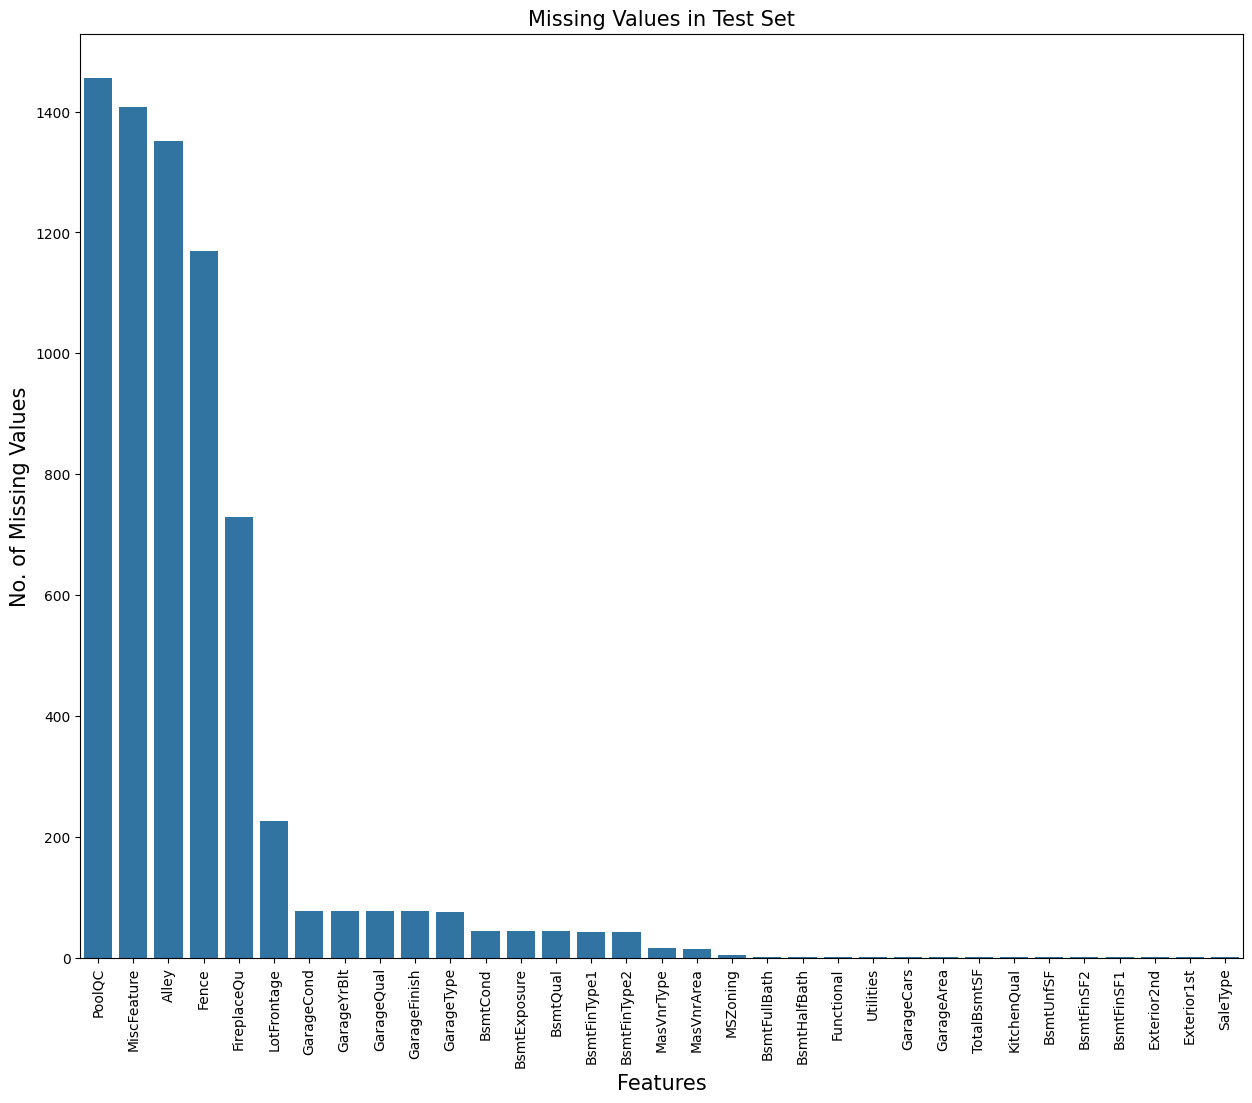

In [17]:
print('Total Data in Test Set:', len(test_data))
print('\nMissing Values in Test Set:\n')
Headings = list(test_data)
MSx = []
MSy = []
for name in Headings:
    if (test_data[name].isnull().sum() > 0):
        print('%s:%d' % (name,test_data[name].isnull().sum()))
        MSx = MSx + [name]
        MSy = MSy + [test_data[name].isnull().sum()]

df = pd.DataFrame(data={'MSx':MSx, 'MSy':MSy})
df = df.sort_values(by=['MSy'], ascending=False)
plt.figure(2, figsize=(15,12))
sns.barplot(x=df.MSx, y=df.MSy)
plt.xticks(rotation=90)
plt.title('Missing Values in Test Set', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('No. of Missing Values', fontsize=15)
plt.show()

In [18]:
NoneCols = ['MiscFeature', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass', 'Alley']

for name in NoneCols:
    train_data[name] = train_data[name].fillna('None')
    test_data[name] = test_data[name].fillna('None')

OCols = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
         'BsmtHalfBath', 'MasVnrArea', 'MasVnrArea']

for name in OCols:
    train_data[name] = train_data[name].fillna(0)
    test_data[name] = test_data[name].fillna(0)

MCols = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']

for name in MCols:
    train_data[name] = train_data[name].fillna(train_data[name].mode()[0])
    test_data[name] = test_data[name].fillna(test_data[name].mode()[0])

train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test_data['LotFrontage'] = test_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test_data['Functional'] = test_data['Functional'].fillna('Typ')

train_data = train_data.drop('Utilities', axis=1)
test_data = test_data.drop('Utilities', axis=1)

if(train_data.isnull().sum().sum() == 0 and test_data.isnull().sum().sum() == 0):
    print('\nNo Missing Values found')
else:
    train_data.isnull().sum()
    print('\nMissing Values are still present')


No Missing Values found


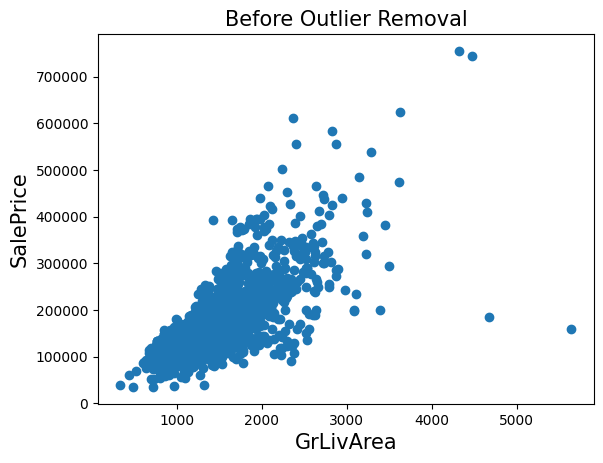

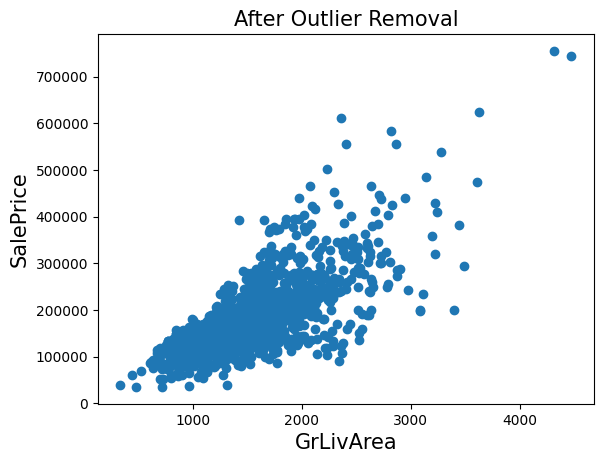

In [19]:
def outlier_detection(train_data):
    # Outlier Detection
    plt.figure(9)
    plt.scatter(x=train_data['GrLivArea'], y=train_data['SalePrice'])
    plt.title('Before Outlier Removal', fontsize=15)
    plt.xlabel('GrLivArea', fontsize=15)
    plt.ylabel('SalePrice', fontsize=15)
    plt.show()
    plt.savefig('Before_Outlier_Removal.png')
    plt.close()

    # Outlier Removal
    train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index)
    train_data = train_data.reset_index()
    train_data = train_data.drop('index', axis=1)

    # Cleaned Data
    plt.figure(10)
    plt.scatter(x=train_data['GrLivArea'], y=train_data['SalePrice'])
    plt.title('After Outlier Removal', fontsize=15)
    plt.xlabel('GrLivArea', fontsize=15)
    plt.ylabel('SalePrice', fontsize=15)

    plt.savefig('After_Outlier_Removal.png')
    plt.show()
    plt.close()
outlier_detection(train_data)


mu(Mean): 12.024
sigma(Standard Deviation): 0.399
Mode: 11


<ipython-input-20-a6f00c26cd20>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'] , fit=stats.norm)


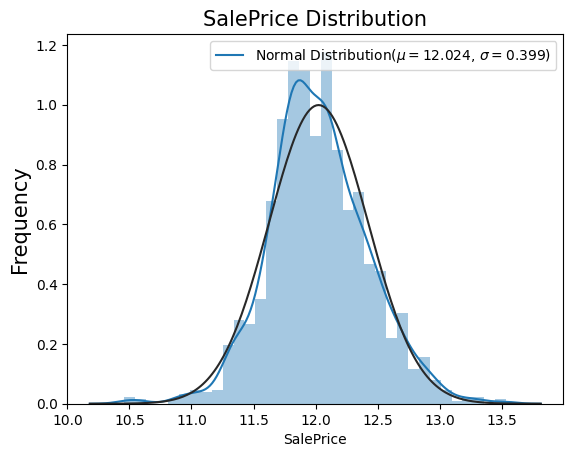

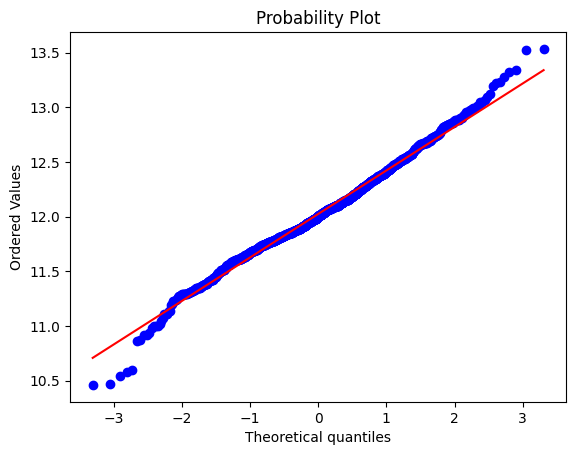

Skewness: 0.12135
Kurtosis: 0.80952

Z-Score: 0       0.560067
1       0.212763
2       0.734046
3      -0.437383
4       1.014651
          ...   
1455    0.121433
1456    0.578019
1457    1.174709
1458   -0.399657
1459   -0.306695
Name: SalePrice, Length: 1460, dtype: float64


In [20]:
Y_train = train_data['SalePrice']
Id_final = test_data['Id']
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

    # New Distribution

    # Mean, Standard Deviation and Mode
(mu, sigma) = stats.norm.fit(train_data['SalePrice'])
mu = round(mu,3)
sigma = round(sigma,3)
mode = int(train_data['SalePrice'].mode())
print('\nmu(Mean):', mu)
print('sigma(Standard Deviation):', sigma)
print('Mode:', mode)

    # Skewness of Target Variable
plt.figure(11)
sns.distplot(train_data['SalePrice'] , fit=stats.norm)
plt.title('SalePrice Distribution', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(['Normal Distribution($\mu=$%.3f, $\sigma=$%.3f)' % (mu,sigma)], loc='best')
plt.show()

    # Probability Plot(Similar to Quantile-Quantile Plot)
plt.figure(12)
stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

    # Skewness and Kurtosis
print('Skewness: %.5f' % train_data['SalePrice'].skew())
print('Kurtosis: %.5f' % train_data['SalePrice'].kurt())

    # Z-Score
Zscore = stats.zscore(train_data['SalePrice'])
print('\nZ-Score:', Zscore)

In [21]:
Train_fe = train_data.copy()
Test_fe = test_data.copy()


print('\nMost important features relative to Target:\n')
CMtx = Train_fe.corr()
CMtx.sort_values(['SalePrice'], ascending = False, inplace = True)
print(CMtx['SalePrice'][abs(CMtx['SalePrice']) >= 0.1])


Train_fe['HsAge'] = Train_fe['YrSold'] - Train_fe['YearBuilt']
Test_fe['HsAge'] = Test_fe['YrSold'] - Test_fe['YearBuilt']
Train_fe['TotalSF'] = Train_fe['TotalBsmtSF'] + Train_fe['1stFlrSF'] + Train_fe['2ndFlrSF']
Test_fe['TotalSF'] = Test_fe['TotalBsmtSF'] + Test_fe['1stFlrSF'] + Test_fe['2ndFlrSF']


Train_fe['MSSubClass'] = Train_fe['MSSubClass'].apply(str)
Test_fe['MSSubClass'] = Test_fe['MSSubClass'].apply(str)
Train_fe['OverallCond'] = Train_fe['OverallCond'].astype(str)
Test_fe['OverallCond'] = Test_fe['OverallCond'].astype(str)
Train_fe['MoSold'] = Train_fe['MoSold'].astype(str)
Test_fe['MoSold'] = Test_fe['MoSold'].astype(str)



cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature',
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(Train_fe[c].values))
    Train_fe[c] = lbl.transform(list(Train_fe[c].values))

    lbl.fit(list(Test_fe[c].values))
    Test_fe[c] = lbl.transform(list(Test_fe[c].values))



"""
    for column in OrdCols:
     Train
    lbl = skpp.LabelEncoder()
    lbl.fit(list(Train_fe[column].values))
    Train_fe[column] = lbl.transform(list(train_data[column].values))
    #encoder=LabelEncoder()
    #Train_fe= train_data.apply(lambda col: encoder.fit_transform(col.astype(str)), axis=0, result_type='expand')

    # Test
    #lbl = skpp.LabelEncoder()
    #lbl.fit(list(Test_fe[column].values))
    #Test_fe[column] = lbl.transform(list(Test_fe[column].values))
    #encoder=LabelEncoder()
    #Test_fe= test_data.apply(lambda col: encoder.fit_transform(col.astype(str)), axis=0, result_type='expand')
"""



NumF = Train_fe.dtypes[Train_fe.dtypes != 'object'].index
NumF = NumF.drop('SalePrice')


SkewedFtrn = Train_fe[NumF].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness in Numerical Features(Train): \n")
df = pd.DataFrame({'Skewness' : SkewedFtrn})
print(df.head(15))


SkewedFtst = Test_fe[NumF].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness in Numerical Features(Test): \n")
df = pd.DataFrame({'Skewness' : SkewedFtst})
print(df.head(15))

Tolerance = 0.2
BoxF = list(SkewedFtrn[abs(SkewedFtrn) > Tolerance].index) + list(SkewedFtst[abs(SkewedFtst) > Tolerance].index)
BoxF = list(set(BoxF))
Lam = 0.15
for name in BoxF:
    Train_fe[name] = boxcox1p(Train_fe[name], Lam)
    Test_fe[name] = boxcox1p(Test_fe[name], Lam)

DF = list(CMtx.index[abs(CMtx['SalePrice']) < 0.02])
Train_fe.drop(DF, axis=1, inplace=True)
Test_fe.drop(DF, axis=1, inplace=True)

#Features that have a very low Correlation with the Target Variable were dropped.


Most important features relative to Target:

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.426776
BsmtFinSF1       0.372023
LotFrontage      0.353288
GarageYrBlt      0.349013
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

Skewness in Numerical Features(Train): 

                Skewness
MiscVal        24.476794
PoolArea       14.828374
Condition2     13.171844
LotArea        12.207688
3SsnPorch      10.304342
Heating         9.855100
Low

<ipython-input-21-67132bcb3557>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CMtx = Train_fe.corr()


In [22]:
Train_fe = train_data.copy()
Test_fe = test_data.copy()


print('\nMost important features relative to Target:\n')
CMtx = Train_fe.corr()
CMtx.sort_values(['SalePrice'], ascending = False, inplace = True)
print(CMtx['SalePrice'][abs(CMtx['SalePrice']) >= 0.1])


Train_fe['HsAge'] = Train_fe['YrSold'] - Train_fe['YearBuilt']
Test_fe['HsAge'] = Test_fe['YrSold'] - Test_fe['YearBuilt']
Train_fe['TotalSF'] = Train_fe['TotalBsmtSF'] + Train_fe['1stFlrSF'] + Train_fe['2ndFlrSF']
Test_fe['TotalSF'] = Test_fe['TotalBsmtSF'] + Test_fe['1stFlrSF'] + Test_fe['2ndFlrSF']


Train_fe['MSSubClass'] = Train_fe['MSSubClass'].apply(str)
Test_fe['MSSubClass'] = Test_fe['MSSubClass'].apply(str)
Train_fe['OverallCond'] = Train_fe['OverallCond'].astype(str)
Test_fe['OverallCond'] = Test_fe['OverallCond'].astype(str)
Train_fe['MoSold'] = Train_fe['MoSold'].astype(str)
Test_fe['MoSold'] = Test_fe['MoSold'].astype(str)



cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature',
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(Train_fe[c].values))
    Train_fe[c] = lbl.transform(list(Train_fe[c].values))

    lbl.fit(list(Test_fe[c].values))
    Test_fe[c] = lbl.transform(list(Test_fe[c].values))



"""
    for column in OrdCols:
     Train
    lbl = skpp.LabelEncoder()
    lbl.fit(list(Train_fe[column].values))
    Train_fe[column] = lbl.transform(list(train_data[column].values))
    #encoder=LabelEncoder()
    #Train_fe= train_data.apply(lambda col: encoder.fit_transform(col.astype(str)), axis=0, result_type='expand')

    # Test
    #lbl = skpp.LabelEncoder()
    #lbl.fit(list(Test_fe[column].values))
    #Test_fe[column] = lbl.transform(list(Test_fe[column].values))
    #encoder=LabelEncoder()
    #Test_fe= test_data.apply(lambda col: encoder.fit_transform(col.astype(str)), axis=0, result_type='expand')
"""



NumF = Train_fe.dtypes[Train_fe.dtypes != 'object'].index
NumF = NumF.drop('SalePrice')


SkewedFtrn = Train_fe[NumF].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness in Numerical Features(Train): \n")
df = pd.DataFrame({'Skewness' : SkewedFtrn})
print(df.head(15))


SkewedFtst = Test_fe[NumF].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness in Numerical Features(Test): \n")
df = pd.DataFrame({'Skewness' : SkewedFtst})
print(df.head(15))

Tolerance = 0.2
BoxF = list(SkewedFtrn[abs(SkewedFtrn) > Tolerance].index) + list(SkewedFtst[abs(SkewedFtst) > Tolerance].index)
BoxF = list(set(BoxF))
Lam = 0.15
for name in BoxF:
    Train_fe[name] = boxcox1p(Train_fe[name], Lam)
    Test_fe[name] = boxcox1p(Test_fe[name], Lam)

DF = list(CMtx.index[abs(CMtx['SalePrice']) < 0.02])
Train_fe.drop(DF, axis=1, inplace=True)
Test_fe.drop(DF, axis=1, inplace=True)

#Features that have a very low Correlation with the Target Variable were dropped.


Most important features relative to Target:

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.426776
BsmtFinSF1       0.372023
LotFrontage      0.353288
GarageYrBlt      0.349013
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

Skewness in Numerical Features(Train): 

                Skewness
MiscVal        24.476794
PoolArea       14.828374
Condition2     13.171844
LotArea        12.207688
3SsnPorch      10.304342
Heating         9.855100
Low

<ipython-input-22-67132bcb3557>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CMtx = Train_fe.corr()


In [37]:
sub = pd.read_csv('/content/sample_submission.csv')
sub.head()


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
# prompt: Using dataframe sub:

sub.describe()
